In [1]:
!pip install joblib==1.4.2 numpy==2.2.3 scikit-learn==1.6.1 --no-cache-dir


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.1 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.6 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.6 MB 2.1 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.6 MB 2.3 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.6 MB 2.7 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.6 MB 2.9 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/12.6 MB 3.0 MB/s eta 0:00:03
   ---------------- ----------------------- 5.2/12.6 MB 3.1 MB/s eta 0:00:03
   ------------------- -------------------- 6.0/12.6 MB 3.1 MB/s eta 0:00:03
   --------------------- ------------------ 6.8/12.6 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 3.1 MB/s eta 0:00:02
   ----------

In [3]:
!pip install imbalanced-learn



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
df = pd.read_csv('Dataset of Diabetes .csv')

In [56]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [57]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [58]:
# Check for missing values
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [59]:
# Encode categorical variables
encode = LabelEncoder()
df['new_gender'] = encode.fit_transform(df['Gender'])
df['new_class'] = encode.fit_transform(df['CLASS'])

In [60]:
# Drop unnecessary columns
df.drop(['Gender', 'CLASS', 'ID'], axis=1, inplace=True)


In [61]:
# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['new_class'], axis=1))

In [62]:
# Split the data into features and target
x = x_scaled
y = df['new_class']

In [63]:
x

array([[-0.07474738, -0.40114429, -0.14478078, ..., -0.369958  ,
        -1.12462205, -1.13968756],
       [-0.06993954, -3.13001704, -0.21295413, ..., -0.34264878,
        -1.32623876,  0.87034341],
       [-0.06586919, -0.40114429, -0.14478078, ..., -0.369958  ,
        -1.12462205, -1.13968756],
       ...,
       [-0.0541266 , -2.67520491,  0.67329948, ...,  1.70554268,
        -0.43912523,  0.87034341],
       [-0.07296316, -1.76558067,  0.23017268, ...,  3.31678663,
         2.2020537 ,  0.87034341],
       [-0.07294836,  0.05366783, -0.04252074, ..., -0.31533956,
         0.68992836,  0.87034341]], shape=(1000, 12))

In [64]:
# Oversample the minority class
ros = RandomOverSampler(random_state=20)
x_res, y_res = ros.fit_resample(x, y)

In [65]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=50)

In [66]:
x_train

array([[-0.07148228, -0.40114429, -0.14478078, ..., -0.26072112,
        -1.12462205,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341],
       ...,
       [-0.07405311, -0.40114429, -0.1106941 , ..., -0.34264878,
        -2.13270561,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341]], shape=(2940, 12))

In [67]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr_pred = lr.predict(x_test)
print(classification_report(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       250
           1       0.90      1.00      0.95       239
           2       0.86      0.95      0.90       256
           3       0.98      0.86      0.92       257
           4       0.95      1.00      0.97       258

    accuracy                           0.93      1260
   macro avg       0.93      0.93      0.93      1260
weighted avg       0.93      0.93      0.93      1260

[[208  13  27   2   0]
 [  0 239   0   0   0]
 [  0  11 242   3   0]
 [  6   2  12 222  15]
 [  0   0   0   0 258]]


In [68]:
# Train a K-nearest neighbors model
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(x_train, y_train)
y_knc_pred = knc.predict(x_test)
print(classification_report(y_test, y_knc_pred))
print(confusion_matrix(y_test, y_knc_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.98      1.00      0.99       239
           2       0.92      1.00      0.96       256
           3       1.00      0.88      0.93       257
           4       0.96      1.00      0.98       258

    accuracy                           0.96      1260
   macro avg       0.96      0.96      0.96      1260
weighted avg       0.96      0.96      0.96      1260

[[235   5  10   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [ 10   0  12 225  10]
 [  0   0   0   0 258]]


In [69]:
# Training random forest model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_rfc_pred = rfc.predict(x_test)
print(classification_report(y_test, y_rfc_pred))
print(confusion_matrix(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.98      0.99       257
           4       0.99      1.00      0.99       258

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260

[[250   0   0   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [  3   0   0 251   3]
 [  0   0   0   0 258]]


In [70]:
# Saving my model
import joblib
joblib.dump(rfc, 'rfc_model.joblib')

['rfc_model.joblib']

In [71]:
# saving it in a file
rfc_loaded = joblib.load('rfc_model.joblib')

In [72]:
import joblib

# Load model in Jupyter
rfc_model_jupyter = joblib.load('rfc_model.joblib')

# Print model details
print(rfc_model_jupyter)


RandomForestClassifier()


In [73]:
error_rate=[]
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_test, y_test)
    pred_i = rfc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

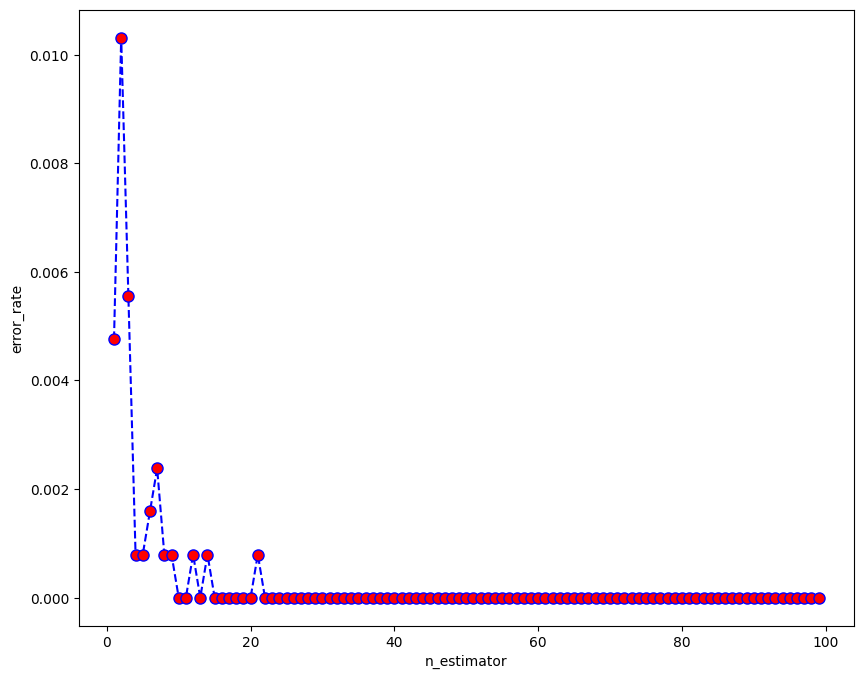

In [74]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 100), error_rate, marker='o', markersize=8, markerfacecolor='red', color='blue', linestyle='dashed')
plt.xlabel('n_estimator')
plt.ylabel('error_rate')

In [75]:
# Train a decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_dtc_pred = dtc.predict(x_test)
print(classification_report(y_test, y_dtc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.96      0.98       257
           4       0.97      1.00      0.99       258

    accuracy                           0.99      1260
   macro avg       0.99      0.99      0.99      1260
weighted avg       0.99      0.99      0.99      1260



In [76]:
# Train a support vector machine model
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)
y_svm_pred = classifier.predict(x_test)
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       1.00      1.00      1.00       239
           2       0.96      1.00      0.98       256
           3       1.00      0.87      0.93       257
           4       0.95      1.00      0.98       258

    accuracy                           0.97      1260
   macro avg       0.97      0.97      0.97      1260
weighted avg       0.97      0.97      0.97      1260



In [77]:
# Save the trained model
pickle.dump(classifier, open('peace_modelD.pkl', 'wb'))

In [78]:
# Load the saved model
file = pickle.load(open('peace_modelD.pkl', 'rb'))

In [79]:
# Make a prediction
input_data = (17975, 50, 4.7, 46, 4.9, 4.2, 0.9, 2.4, 1.4, 0.5, 24.0, 0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = file.predict(input_data_reshaped)
print(prediction)

[0]


In [80]:
if prediction == 0:
    print('The person is not diabetes')
elif prediction == 1:
    print('The person is diabetes')
elif prediction == 2:
    print('Predicted diabetes')
else:
    print('Mixed prediction')

The person is not diabetes


In [81]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

Text(0.5, 1.0, 'Learning Curve')

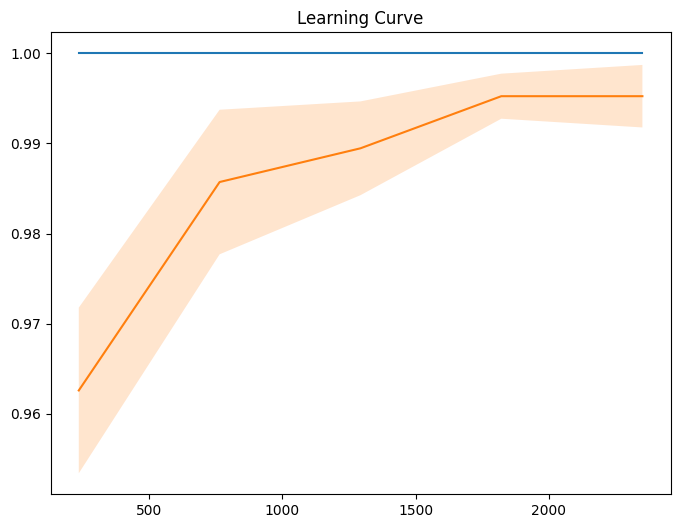

In [82]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dtc, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve')

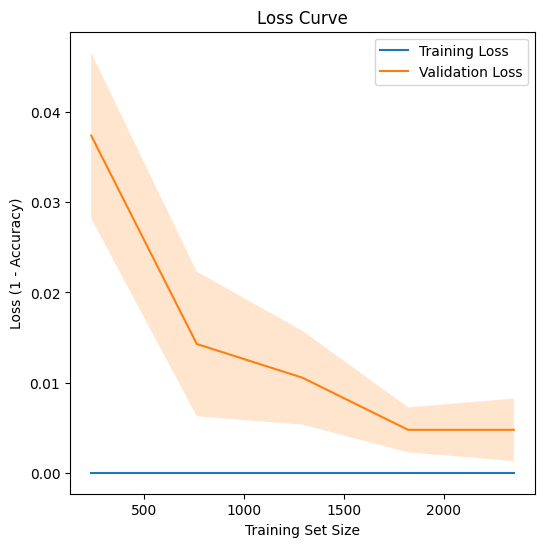

In [83]:
# Loss Curve
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, 1 - train_mean, label='Training Loss')
plt.fill_between(train_sizes, 1 - train_mean + train_std, 1 - train_mean - train_std, alpha=0.2)
plt.plot(train_sizes, 1 - test_mean, label='Validation Loss')
plt.fill_between(train_sizes, 1 - test_mean + test_std, 1 - test_mean - test_std, alpha=0.2)
plt.title('Loss Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.legend()
plt.show()

In [35]:
!pip install streamlit==1.42.2

  Using cached streamlit-1.42.2-py2.py3-none-any.whl.metadata (8.9 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-19.0.1-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.

In [84]:
import streamlit
streamlit.__version__

'1.42.2'

In [85]:
import joblib
print(joblib.__version__)

1.4.2


In [86]:
import numpy
numpy.__version__

'2.2.3'

In [87]:
import sklearn
sklearn.show_versions()


System:
    python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
executable: c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Scripts\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0.1
   setuptools: 76.0.0
        numpy: 2.2.3
        scipy: 1.15.2
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.1
       joblib: 1.4.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libscipy_openblas
       filepath: C:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\numpy.libs\libscipy_openblas64_-43e11ff0749b8cbe0a615c9cf6737e0e.dll
        version: 0.3.28
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libscipy_openblas
       filepath: C:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sci

In [88]:
import pandas
pandas.__version__


'2.2.3'

In [89]:
import matplotlib
matplotlib.__version__

'3.10.1'

In [90]:
import scipy
scipy.__version__

'1.15.2'

In [91]:
import pkg_resources

# Check scikit-learn version
print("Scikit-learn version:", sklearn.__version__)
import sys

print("Python version:", sys.version)

Scikit-learn version: 1.6.1
Python version: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]


In [92]:
import seaborn

In [93]:
import pickle